# Skewed theoretical probability distributions

This section develops the explanation of how candidate selection methods have been constructed with theoretical probability distributions. 

The objective is to construct candidate selection methods given a list of candidates ordered from best to worst candidate. In order to maintain the order generated by the heuristics, the aim is to give a greater probability of being elected to those candidates who are better (Grasas et al., 2017).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Triangular distribution

First we start with the triangular distribution. The idea is simple, we will build a method to which we will provide a list size of candidates will provide a random position to choose from within that range. As we have said before, we will try to make the best candidates more likely to be chosen, so we will use a triangular-shaped function.

If we consider the following function we can build what is proposed

In [2]:
def get_random_triangular_position_bad(n):
    position = n * (1 - np.sqrt(np.random.random()))
    return int(np.round(position))

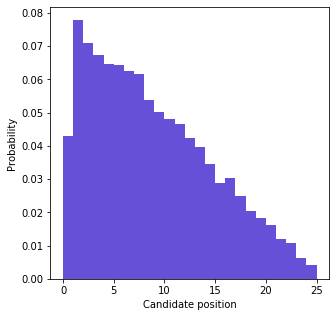

In [3]:
plt.figure(figsize=(5,5))
plt.hist([get_random_triangular_position_bad(25) for _ in range (10000) ],
         density=True, bins=25, color='#4A31D1', alpha=0.85)
plt.xlabel('Candidate position')
plt.ylabel('Probability')
plt.show()

But we can see that there is a problem in the distribution of values in the experiment with respect to the 0 position in the list of elements, this occurs due to rounding. We solve this as follows.

In [4]:
def get_random_triangular_position(n):
    position = 0
    while position < 0.5:
        position = (n+1) * (1 - np.sqrt(np.random.random()))
    return int(np.round(position)) - 1

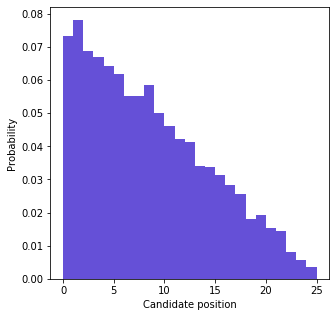

In [5]:
fig = plt.figure(figsize=(5,5))
plt.hist([get_random_triangular_position(25) for _ in range (10000) ],
         density=True, bins=25, color='#4A31D1', alpha=0.85)
plt.xlabel('Candidate position')
plt.ylabel('Probability')
plt.show()
#fig.savefig('../project_miscellany/images/triangular_distribution.png')

## Geometric distribution

Another way to select a position within a list of elements giving priority to the best candidates is through a geometric distribution. The function that has been programmed has a similar behavior to the previous one, given a size of the list of candidates it returns a random value of position to be selected. On this occasion we have to give the function a beta value that allows tuning the shape of the distribution. The closer it is to beta to zero the more it will tend to a uniform distribution and therefore to a random search and the closer it is to one the more similar it will be to a greedy algorithm.

In this function the same thing happens as in the previous one so we are forced to modify it to respect the probabilities of the zero position.

In [6]:
def get_random_geometric_position(n, beta):
    position = 0
    while position < 0.5:
        position = np.log(np.random.random()) / np.log(1 - beta)
        position = position % (n + 1)
    return int(np.round(position)) - 1

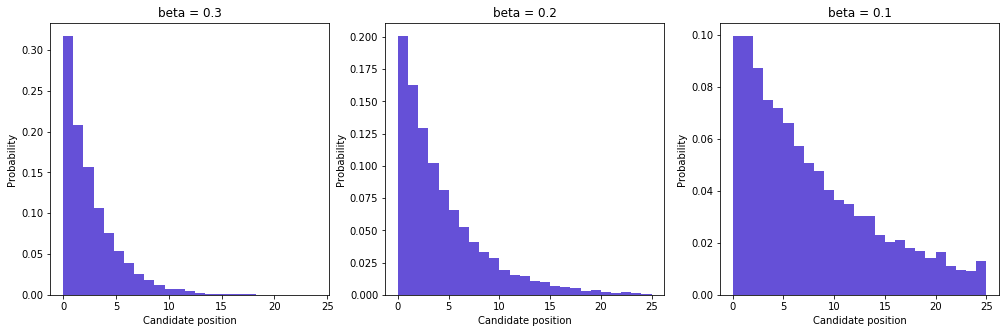

In [7]:
fig = plt.figure(figsize=(17, 5))
beta = [0.3, 0.2, 0.1]

for i in range(len(beta)):
    plt.subplot(1,3,i+1)
    plt.hist([get_random_geometric_position(25, beta[i]) for _ in range (10000) ],
             density=True, bins=25, color='#4A31D1', alpha=0.85)
    plt.title('beta = {}'.format(beta[i]))
    plt.xlabel('Candidate position')
    plt.ylabel('Probability')

plt.show()
#fig.savefig('../project_miscellany/images/geometric_distribution.png')

## Bibliography
Grasas, A., Juan, A.A., Faulin, J., de Armas, J., Ramalhinho, H., 2017. Biased randomization of heuristics using skewed probability distributions: A survey and some applications. Computers & Industrial Engineering 110, 216–228. https://doi.org/10.1016/j.cie.2017.06.019

